# Non-Negative Matrix Factorization (NMF) Topic Modelling

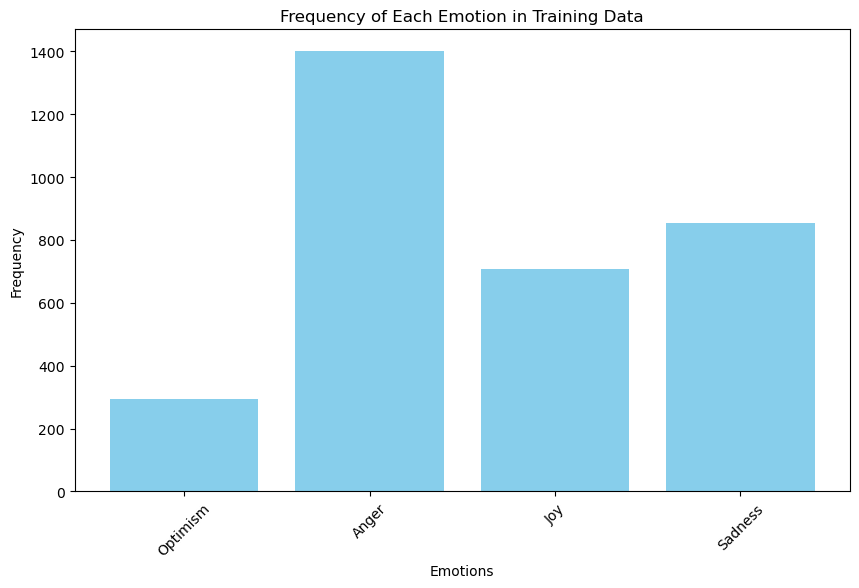

Joy Topics:
Topic #1 - Joy:
lively broadcast musically amazing watch ill chelsea thats bit thing
Topic #2 - Joy:
hilarious thats lmao called great rojo watched didnt movie oh
Topic #3 - Joy:
im day happy really shaking birthday excited watching tomorrow elated
Topic #4 - Joy:
love new blue awe great birthday friend thanks lot horror
Topic #5 - Joy:
lol like night look cheer know didnt ball man make


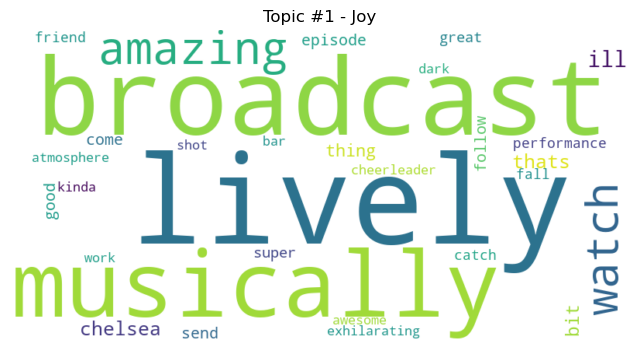

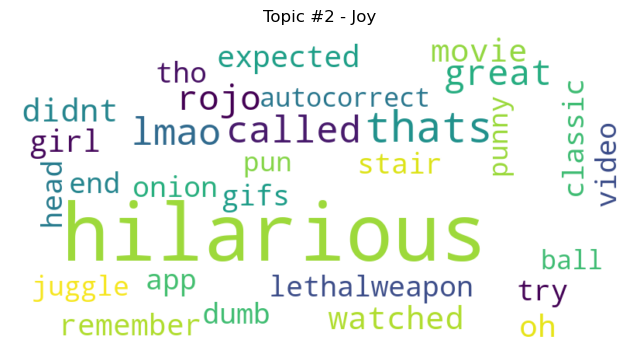

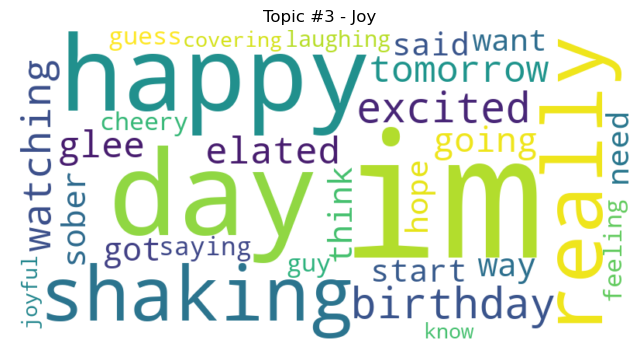

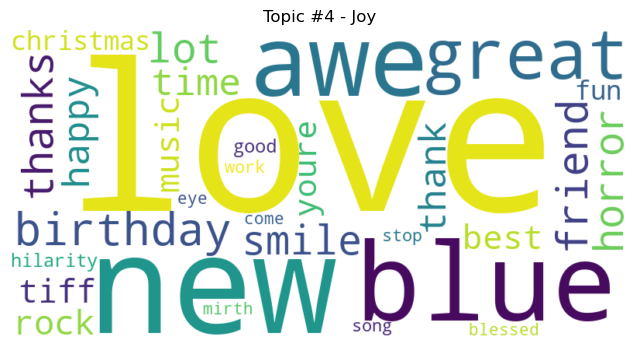

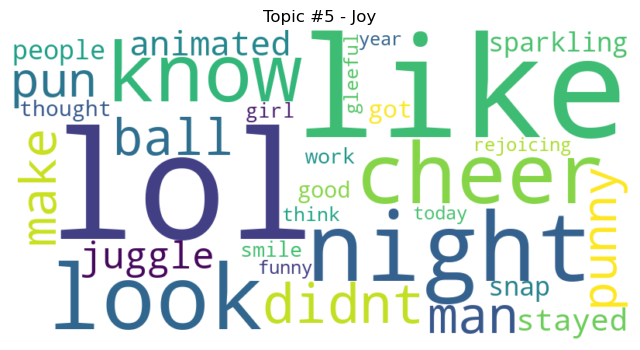

Optimism Topics:
Topic #1 - Optimism:
worry leadership problem care nthrow worryingworriednpeter water dont experience hell
Topic #2 - Optimism:
fear life let live quote refuse truth want love drop
Topic #3 - Optimism:
optimism like believe want think blessed new place actually im
Topic #4 - Optimism:
start afraid work advice game thats new time agree success
Topic #5 - Optimism:
youre dont good think wrong make better discouraged lord heart


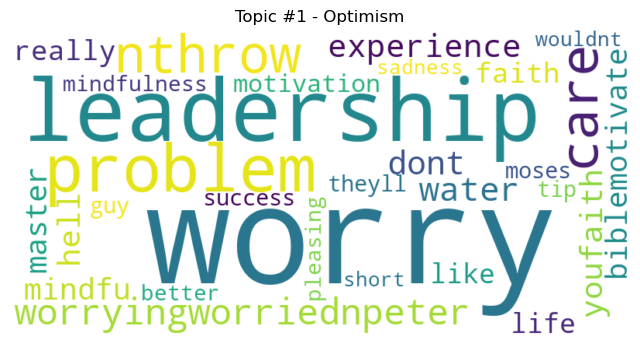

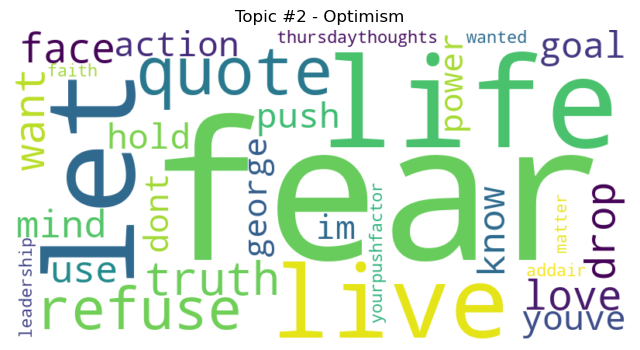

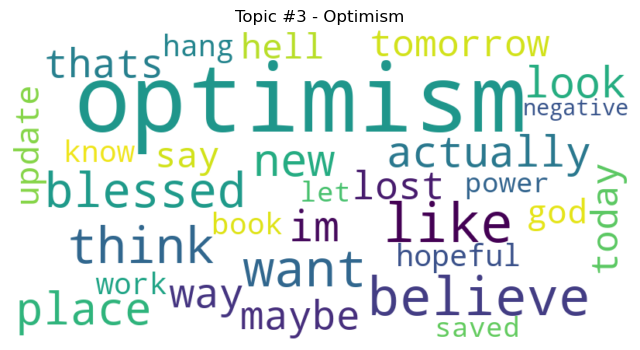

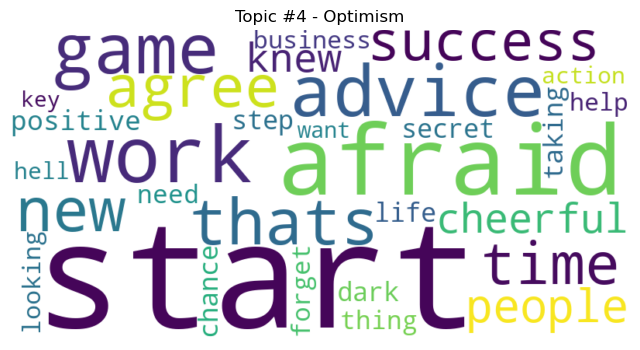

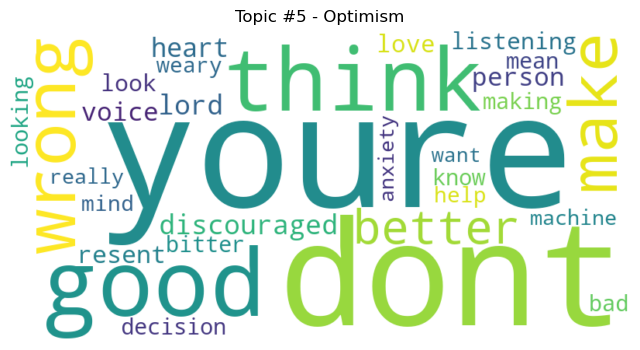

In [3]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datasets import load_dataset
from collections import Counter

# Load the datasets
cache_dir = "./data_cache"
train_dataset = load_dataset("tweet_eval", name="emotion", split="train", cache_dir=cache_dir)
val_dataset = load_dataset("tweet_eval", name="emotion", split="validation", cache_dir=cache_dir)
test_dataset = load_dataset("tweet_eval", name="emotion", split="test", cache_dir=cache_dir)

train_texts = train_dataset['text']
train_labels = train_dataset['label']

val_texts = val_dataset['text']
val_labels = val_dataset['label']

test_texts = test_dataset['text']
test_labels = test_dataset['label']

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_texts(texts):
    processed_texts = []
    for text in texts:
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stop_words and word not in ['amp', 'u']]
        processed_texts.append(' '.join(tokens))
    return processed_texts

# Preprocess all texts
processed_train_texts = preprocess_texts(train_texts)

# Extract and visualize the frequency of each emotion category
emotion_counts = Counter(train_labels)
emotion_names = {0: "Anger", 1: "Joy", 2: "Optimism", 3: "Sadness"}
emotion_labels = [emotion_names[label] for label in emotion_counts.keys()]

plt.figure(figsize=(10, 6))
plt.bar(emotion_labels, emotion_counts.values(), color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Frequency of Each Emotion in Training Data')
plt.xticks(rotation=45)
plt.show()

# Define a function to preprocess and tokenize texts for a given emotion
def preprocess_and_tokenize_texts(texts, labels, target_label):
    filtered_texts = [texts[i] for i in range(len(texts)) if labels[i] == target_label]
    processed_texts = preprocess_texts(filtered_texts)
    return processed_texts

# Define a function to perform NMF and visualize topics
def nmf_and_visualize(processed_texts, num_topics=5, emotion_name="Emotion"):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(processed_texts)
    
    nmf_model = NMF(n_components=num_topics, random_state=30)
    nmf_W = nmf_model.fit_transform(tfidf)
    nmf_H = nmf_model.components_

    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(nmf_H):
        print(f"Topic #{topic_idx + 1} - {emotion_name}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    
    # Visualize the topics using word clouds
    for topic_idx, topic in enumerate(nmf_H):
        topic_dict = {feature_names[i]: topic[i] for i in topic.argsort()[:-31:-1]}
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_dict)
        plt.figure(figsize=(8, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic #{topic_idx + 1} - {emotion_name}")
        plt.show()

# Preprocess and tokenize texts for each emotion
joy_texts = preprocess_and_tokenize_texts(train_texts, train_labels, 1)
optimism_texts = preprocess_and_tokenize_texts(train_texts, train_labels, 2)

# Perform NMF and visualize topics for each emotion
print("Joy Topics:")
nmf_and_visualize(joy_texts, emotion_name="Joy")

print("Optimism Topics:")
nmf_and_visualize(optimism_texts, emotion_name="Optimism")